# Manipulation of CMIP6 model data using Pangeo catalog

## Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

## Reading file from bucket

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [3]:
#s3path = "s3://escience2022/Zhihong/o3_AERmon_GISS-E2-1-G_historical_r1i1p3f1_gn_185001-190012.nc"
# Using cb_O3 because it is cummulative ozone without the levels
s3path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [4]:
#do = xr.open_dataset(s3.open(s3path))
#do

### Get metadata corresponding to near-surface air temperature (tas)

In [5]:
#print(do['cb_O3'])

In [6]:
#do.time.values;

In [7]:
#Converting Ozone to Dobson units:
#https://sacs.aeronomie.be/info/dobson.php
#do['cb_O3']=do['cb_O3']/(2.1415*(10**(-5)))

#do

### Select time

- Select a specific time

In [8]:
#do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1970, 7, 1,0,0,0)).plot(cmap = 'coolwarm')

- select the nearest time. Here from 1st April 1950

In [9]:
#do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1850, 4, 1), method='nearest').plot(x = 'lon',cmap='coolwarm')

# Customize plot

### Set the size of the figure and add coastlines

In [10]:
#fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
#ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#do['cb_O3'].isel(time=6).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')

### Change plotting projection

In [11]:
#fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
#ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
#ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
#do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
#plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)

### Choose the extent of values
- Fix your minimum and maximum values in your plot and
- Use extend so values below the minimum and max

In [12]:
#fig = plt.figure(1, figsize=[10,10])

#ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
#3ax.coastlines()

# Fix extent
#minval = do['cb_O3'].min()
#maxval = do['cb_O3'].max()

# pass extent with vmin and vmax parameters
#do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
#plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)

# Multiplots
### Faceting

In [13]:
#proj_plot = ccrs.Orthographic(0, 90)

#p = do['cb_O3'].sel(time = do.time.dt.year.isin([1986,1987,1988,1989,1990,1991])).squeeze().plot(x='lon', y='lat', 
                                                                 #transform=ccrs.PlateCarree(),
                                                                 #aspect=do.dims["lon"] / do.dims["lat"],  # for a sensible figsize
                                                                 #subplot_kws={"projection": proj_plot},
                                                                 #col='time', col_wrap=6, robust=True, cmap='PiYG')
# We have to set the map's options on all four axes
#for ax,i in zip(p.axes.flat,  do.time.sel(time = do.time.dt.year.isin([1986,1987,1988,1989,1990,1991])).values):
    #ax.coastlines()
    #ax.set_title(i.strftime("%B %Y"), fontsize=18)

### Combine plots with different projections

In [14]:
#fig = plt.figure(1, figsize=[20,10])

# Fix extent
#minval = do['cb_O3'].min()
#maxval = do['cb_O3'].max()

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
#ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
#ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

#tsel = 7
#for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    #map = do['cb_O3'].isel(time=tsel).squeeze().plot(ax=ax, 
                                           #transform=ccrs.PlateCarree(), 
                                           #cmap='coolwarm', 
                                           #add_colorbar=False)
    #ax.set_title(t + " Hemisphere \n" , fontsize=15)
    #ax.coastlines()
    #ax.gridlines()

# Title for both plots
#fig.suptitle('O3\n' + do.time.values[tsel].strftime("%B %Y"), fontsize=20)


#cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

#cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
#cbar.ax.tick_params(labelsize=25)
#cbar.ax.set_ylabel('K', fontsize=25)

In [15]:
import numpy as np

In [16]:
#month_length = do.time.dt.days_in_month

#wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

#np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)


#da= (do.cb_O3*wgts).groupby('time.year').sum(dim='time')
#da

In [17]:
#doy=do.groupby('time.year').mean('time')
#doy




#doO3_be=da.sel(lon=1, lat=90, method='nearest').sel(year = da.year.isin([1985,1986,1987,1988,1989,1990,1991]))
#doO3_af=da.sel(lon=1, lat=90, method='nearest').sel(year = da.year.isin([1991,1992,1993,1994,1995,1996,1997]))



#mean_be=doO3_be.mean()
#mean_af=doO3_af.mean()


#O3_anomaly_be=mean_be-doO3_be
#O3_anomaly_af=mean_af-doO3_af

#doO3_be.plot(x='year')
#doO3_af.plot(x='year')

#plt.legend()


### Anomaly in weighted aera

In [18]:
def computeWeightedMean(ds):
    # Compute weights based on the xarray you pass
    weights = np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    # Compute weighted mean
    air_weighted = ds.weighted(weights)
    weighted_mean = air_weighted.mean(("lon", "lat"))
    return weighted_mean

In [75]:
s6path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16.cam.h0.197001-201412.nc'
d2 = xr.open_dataset(s3.open(s6path))
d2.time.values;
ds2=d2['cb_O3']/(2.1415*(10**(-5)))

In [23]:
do = xr.open_dataset(s3.open(s3path))
do.time.values;
ds=do['cb_O3']/(2.1415*(10**(-5)))
#assign_attrs({'units': '$^\circ$C'})

#ds

In [107]:
s7path = 's3://science2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16/T.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16.cam.h0.197001-201412.nc'
dt = xr.open_dataset(s3.open(s6path))
dt.time.values;
dtt=dt['cb_O3']/(2.1415*(10**(-5)))

In [108]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(2005,1,15)

ds_1986_1996 = ds.sel(time=slice(start,end))
d2_1986_1996 = ds2.sel(time=slice(start,end))
dt_1986_1996 = dtt.sel(time=slice(start,end))

In [84]:
#from emma
start_prior_eruption = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)

end_during_eruption = cftime.DatetimeNoLeap(1996,1,15)

prior_erup = do.cb_O3.sel(time=slice(start_prior_eruption,end_prior_eruption)).squeeze()
during_erup = do.cb_O3.sel(time=slice(start_prior_eruption,end_during_eruption)).squeeze()

In [85]:
climatology = ds_1986_1996.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
annual_mean = ds_1986_1996.groupby('time.year').mean('time')

climatology_d2 = d2_1986_1996.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
annual_mean_d2 = d2_1986_1996.groupby('time.year').mean('time')




In [93]:
NorESM_anom=annual_mean-climatology
NorESM_anom;

NorESM_anom_d2=annual_mean_d2-climatology_d2
NorESM_anom;

difference= annual_mean-annual_mean_d2

In [109]:
north_anomaly = computeWeightedMean(NorESM_anom.where(NorESM_anom['lat']>60.)).compute()
south_anomaly = computeWeightedMean(NorESM_anom.where(NorESM_anom['lat']<-60.)).compute()
global_anomaly= computeWeightedMean(NorESM_anom).compute()

north_anomaly_d2 = computeWeightedMean(NorESM_anom_d2.where(NorESM_anom_d2['lat']>60.)).compute()
south_anomaly_d2 = computeWeightedMean(NorESM_anom_d2.where(NorESM_anom_d2['lat']<-60.)).compute()
global_anomaly_d2= computeWeightedMean(NorESM_anom_d2).compute()

n_diff = computeWeightedMean(difference.where(difference['lat']>60.)).compute()
s_diff = computeWeightedMean(difference.where(difference['lat']<-60.)).compute()
g_diff= computeWeightedMean(difference).compute()

g_t=computeWeightedMean(dt_1986_1996).compute()

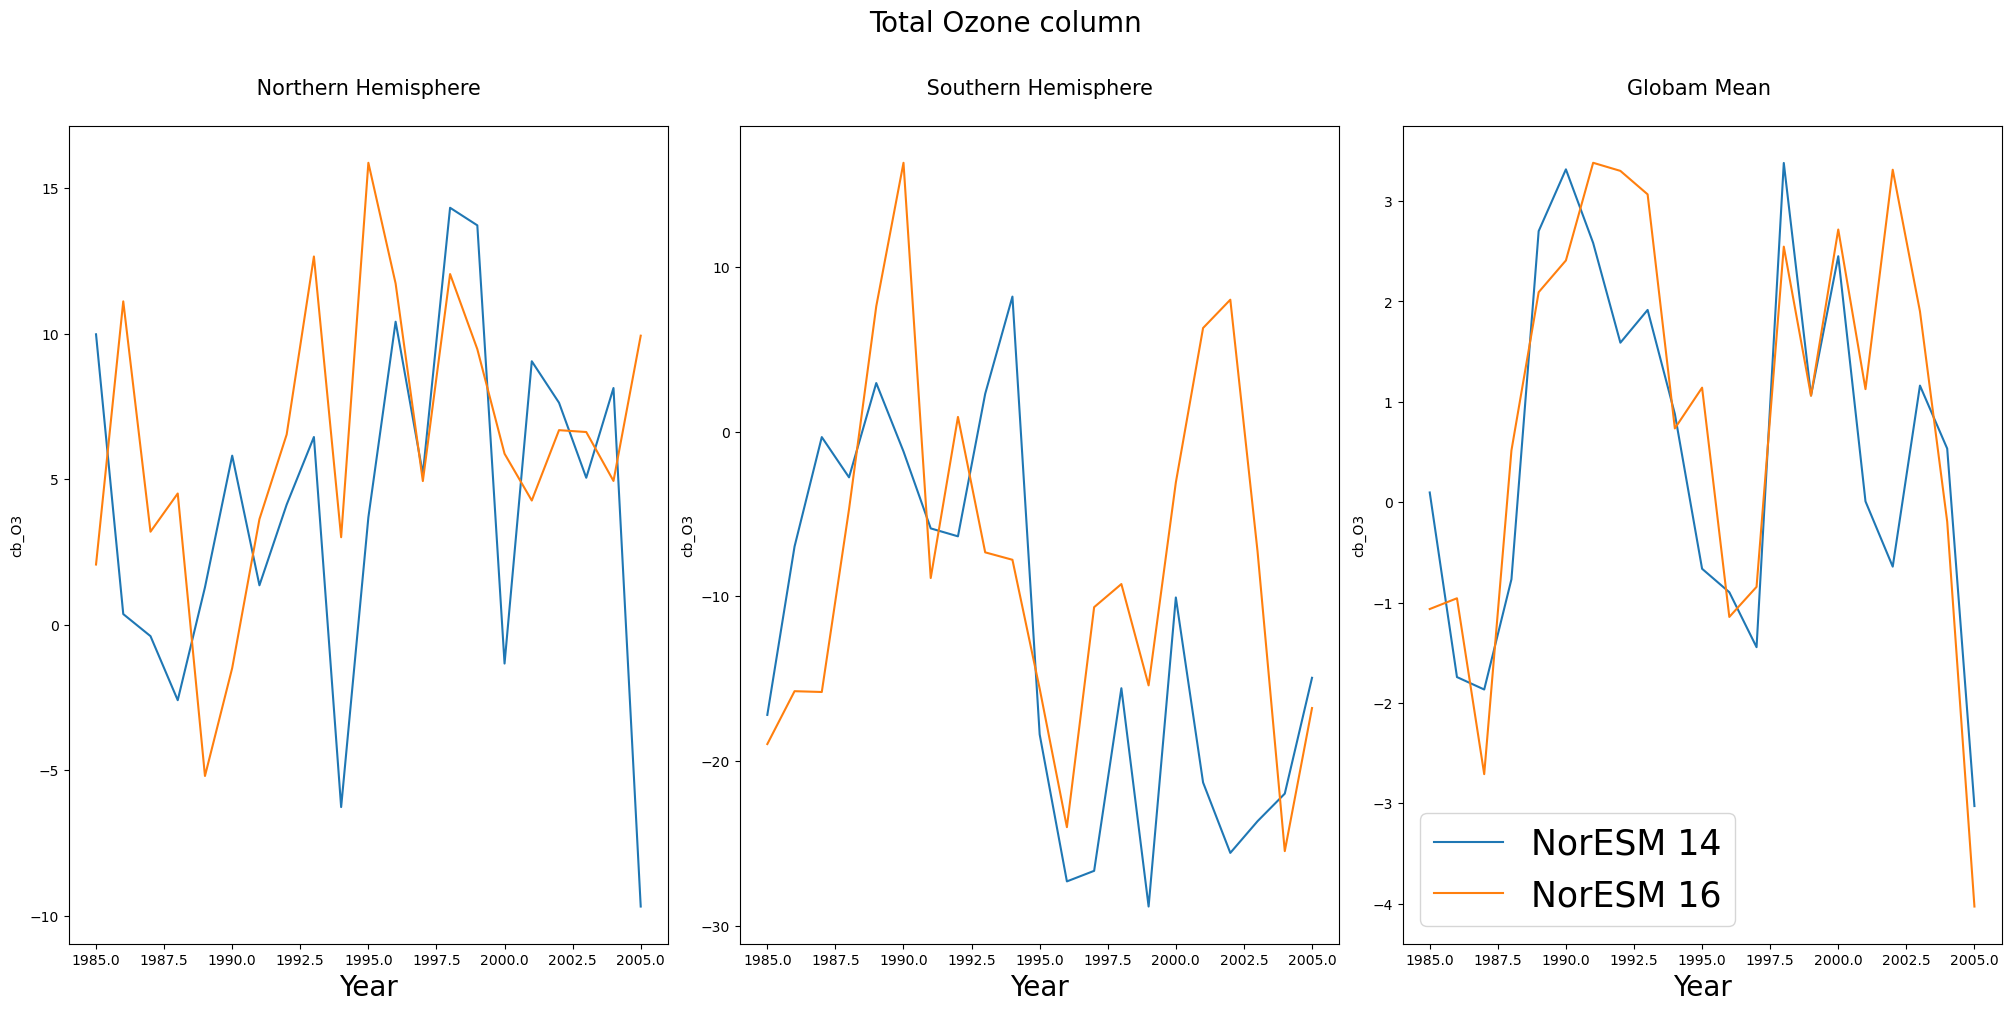

In [95]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

#w_m_w_n_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs1)
north_anomaly.plot(label="NorESM 14", ax=axs1)
north_anomaly_d2.plot(label='NorESM 16', ax=axs1)
#weighted_mean_waccm.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs1)

#w_m_w_south_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs2)
south_anomaly.plot(label="NorESM 14", ax=axs2)
south_anomaly_d2.plot(label='NorESM 16', ax=axs2)
#weighted_mean_waccm_south.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs2)

global_anomaly.plot(label="NorESM 14",ax=axs3)
global_anomaly_d2.plot(label='NorESM 16', ax=axs3)

fig.suptitle('Total Ozone column\n', fontsize=20)

axs1.set_xlabel('Year',fontsize=20)
axs2.set_xlabel('Year',fontsize=20)
axs3.set_xlabel('Year',fontsize=20)
#axs1.tick_params(fontsize=20)

axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
axs3.set_title('Globam Mean \n', fontsize=15)
plt.legend(fontsize=25)

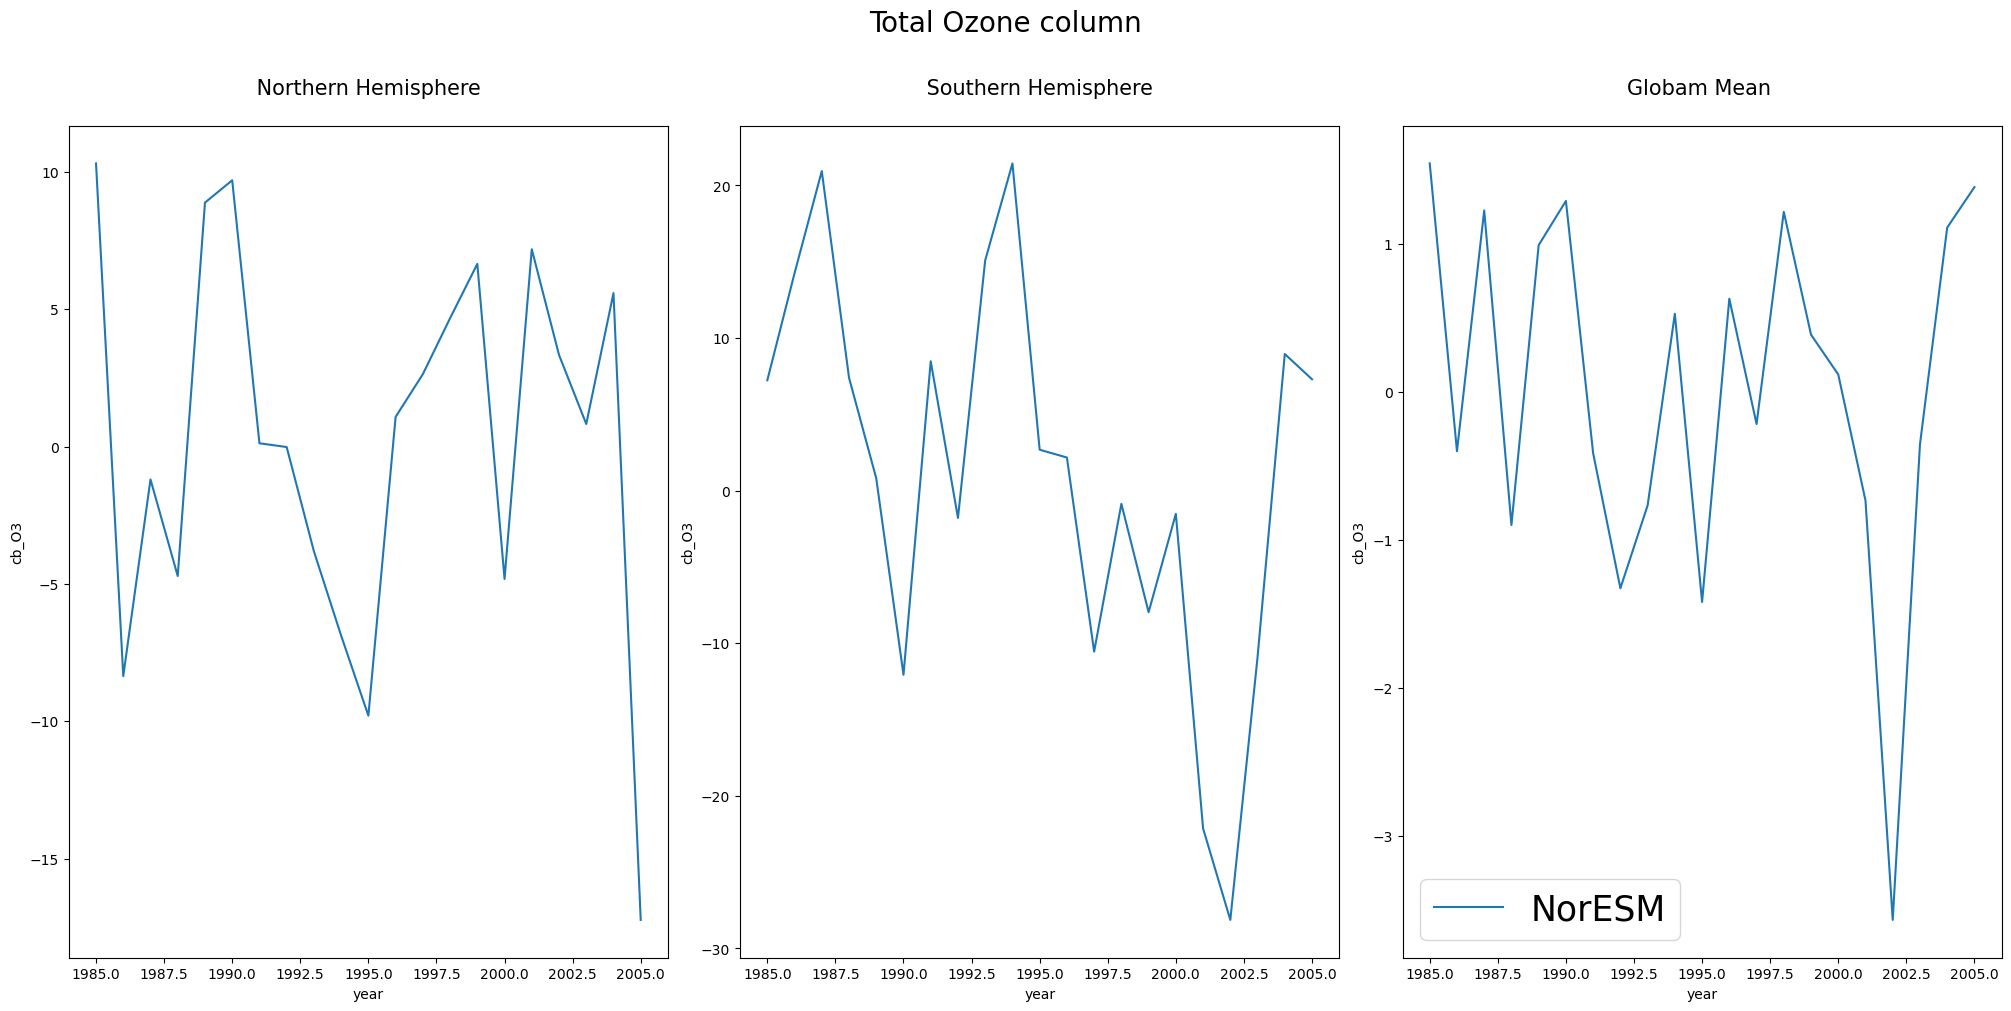

In [97]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

#w_m_w_n_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs1)
n_diff.plot(label="NorESM", ax=axs1)
#weighted_mean_waccm.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs1)

#w_m_w_south_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs2)
s_diff.plot(label="NorESM", ax=axs2)
#weighted_mean_waccm_south.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs2)

g_diff.plot(label="NorESM",ax=axs3)

fig.suptitle('Total Ozone column\n', fontsize=20)

axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
axs3.set_title('Globam Mean \n', fontsize=15)
plt.legend(fontsize=25)

### Sulfate


In [58]:
s4path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_SULFATE.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [59]:
du = xr.open_dataset(s3.open(s4path))
du

<xarray.Dataset>
Dimensions:     (lat: 192, lon: 288, lev: 32, ilev: 33, time: 540, nbnd: 2)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev        (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time        (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam        (lev) float64 ...
    hybm        (lev) float64 ...
    P0          float64 ...
    hyai        (ilev) float64 ...
    hybi        (ilev) float64 ...
    date        (time) int32 ...
    time_bnds   (time, nbnd) object ...
    PS          (time, lat, lon) float32 ...
    cb_SULFATE  (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14
    logname:           olivie
    host:              
    initial_file:      NHISTfrc2_f09_tn14_20191025.cam.i.1970-01-01-00000.nc
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Fri Oct 28 13:16:38 2022: ncrcat /scratch/olivie/cmip6...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [60]:
du.time.values;

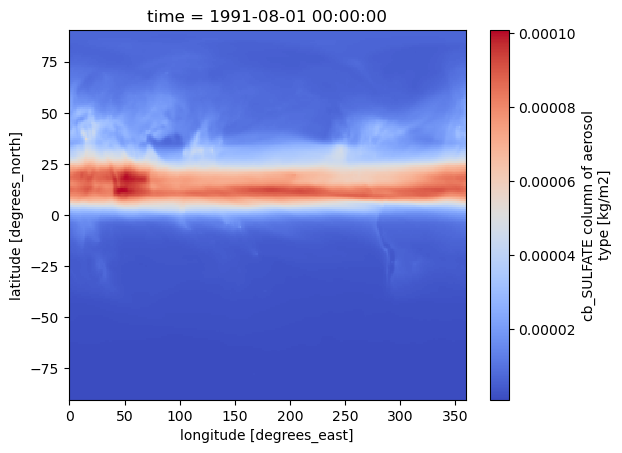

In [105]:
du['cb_SULFATE'].sel(time=cftime.DatetimeNoLeap(1991, 8, 1,0,0,0)).plot(cmap = 'coolwarm')

In [62]:
s5path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/D550_SO4.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [70]:
da = xr.open_dataset(s3.open(s5path))
dr = da['D550_SO4']
dr

<xarray.DataArray 'D550_SO4' (time: 540, lat: 192, lon: 288)>
[29859840 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    units:         unitless
    long_name:     SO4 aerosol optical depth 550nm
    cell_methods:  time: mean

In [65]:
dr_1986_1996 = dr.sel(time=slice(start,end))
climatology_so4 = dr_1986_1996.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
annual_mean_so4 = dr_1986_1996.groupby('time.year').mean('time')

In [66]:
NorESM_anom_so4=annual_mean_so4-climatology_so4
NorESM_anom_so4;

In [68]:
north_anomaly_so4 = computeWeightedMean(NorESM_anom_so4.where(NorESM_anom['lat']>60.)).compute()
south_anomaly_so4 = computeWeightedMean(NorESM_anom_so4.where(NorESM_anom['lat']<-60.)).compute()
global_anomaly_so4= computeWeightedMean(NorESM_anom_so4).compute()

In [71]:
north_so4 = computeWeightedMean(dr_1986_1996.where(NorESM_anom['lat']>60.)).compute()
south_so4 = computeWeightedMean(dr_1986_1996.where(NorESM_anom['lat']<-60.)).compute()
global_so4= computeWeightedMean(dr_1986_1996).compute()

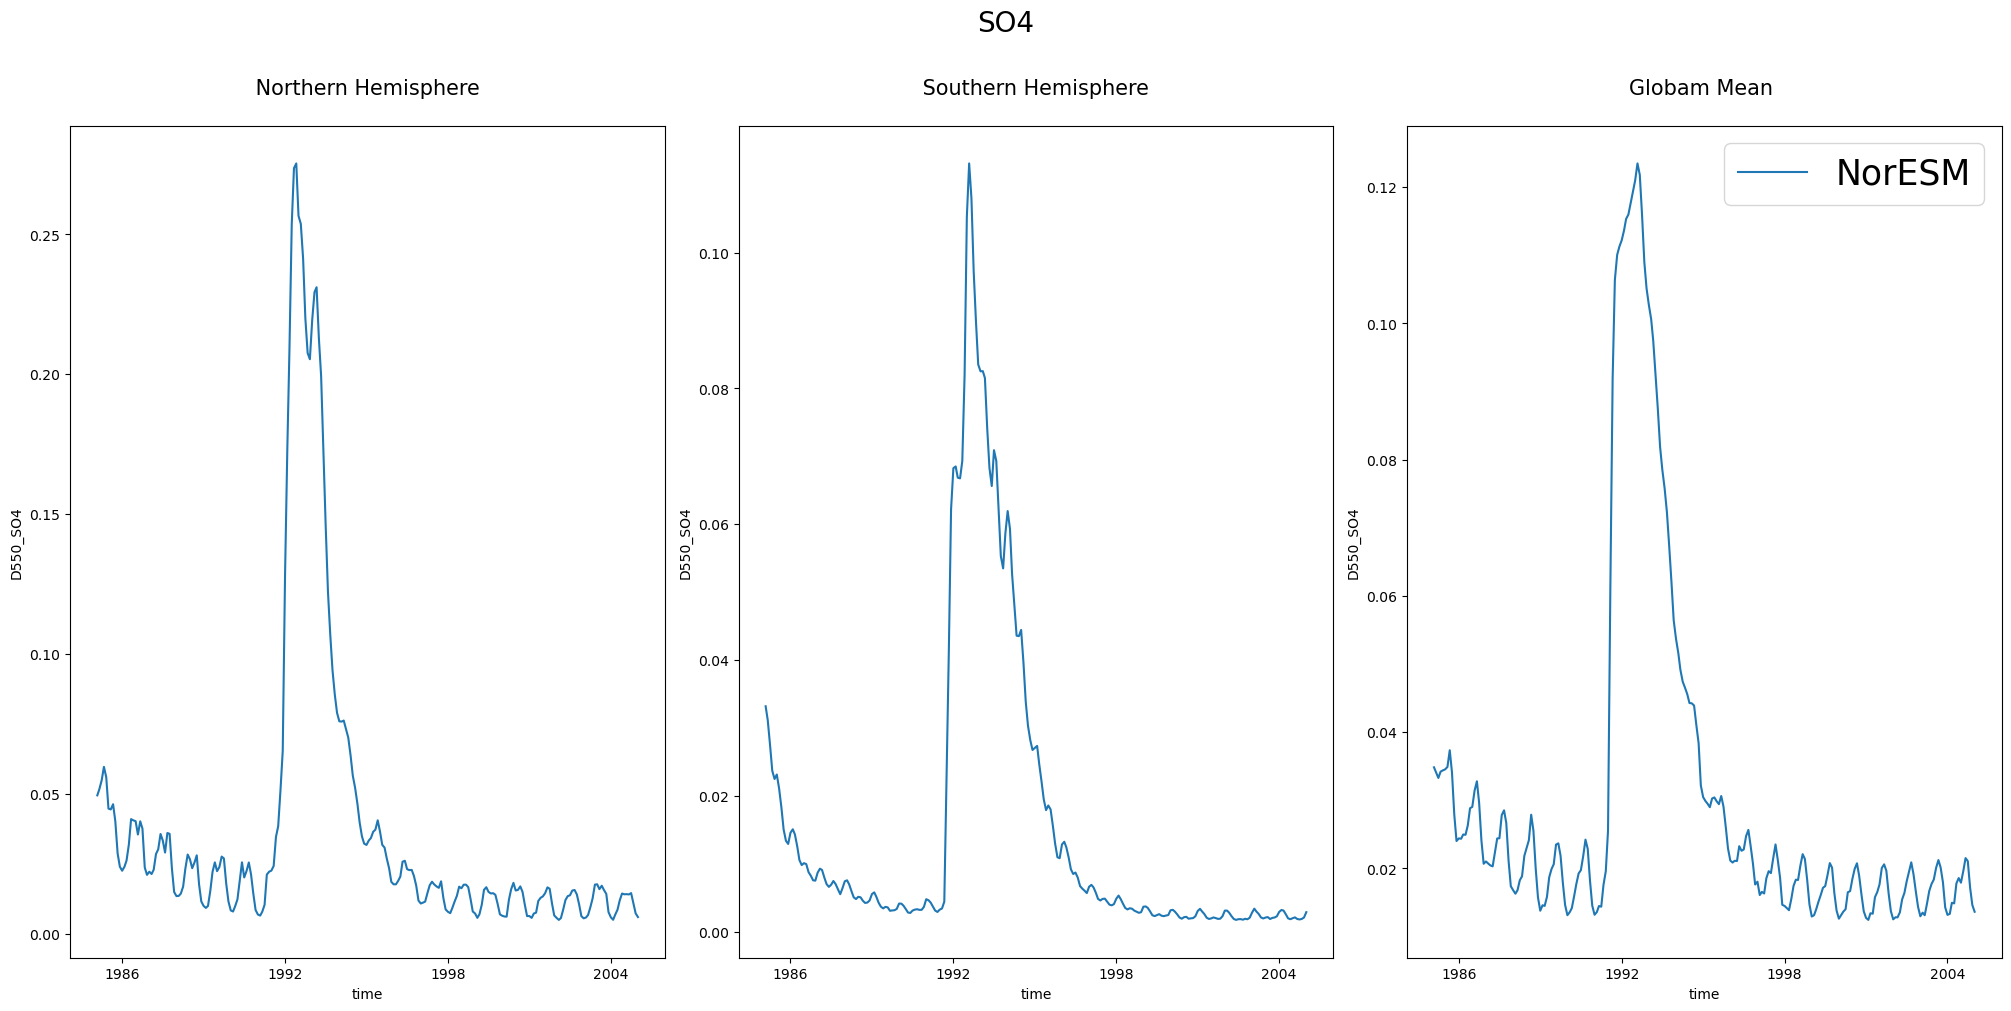

In [72]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

#w_m_w_n_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs1)
north_so4.plot(label="NorESM", ax=axs1)
#weighted_mean_waccm.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs1)

#w_m_w_south_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs2)
south_so4.plot(label="NorESM", ax=axs2)
#weighted_mean_waccm_south.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs2)

global_so4.plot(label="NorESM",ax=axs3)

fig.suptitle('SO4\n', fontsize=20)

axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
axs3.set_title('Globam Mean \n', fontsize=15)
plt.legend(fontsize=25)